## Define business goal
We are trying to predict number of visitors for next year. We have data from the mall with unknown features and weather forecast Data presented for each day, we will use regression model to predict the results
Import libraries


In [137]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.dummy import DummyRegressor
import datetime

Scores to estimate regression model: mean_squared_error, r2_score

In [66]:
def print_scores(model, y_test, y_pred_test, y_train, y_pred_train):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2 = r2_score(y_test, y_pred_test)
    mape = mean_absolute_percentage_error(y_test, y_pred_test)
    rmse_ = np.sqrt(mean_squared_error(y_train, y_pred_train))
    r2_ = r2_score(y_train, y_pred_train)
    mape_ = mean_absolute_percentage_error(y_train, y_pred_train)
    print(model)
    print('Test')
    print('RMSE: ',rmse.round(2))
    print('R2: ',r2.round(2))
    print('MAPE: ',mape.round(2))
    print('Train')
    print('RMSE: ',rmse_.round(2))
    print('R2: ',r2_.round(2))
    print('MAPE: ',mape_.round(2))
    res.loc[-1] = [model, rmse_, r2_, mape_, rmse, r2, mape]
    res.index = res.index + 1
    res.sort_index(inplace=True)

Plotting function

In [67]:
plt.rcParams['figure.figsize'] = (14,6)
def plot(df, title):
    df.plot()
    plt.title(title)
    plt.ylabel('label')
    plt.show()

DF for results

In [68]:
data = {'Model': '', 'RMSE_train': [], 'R2_train':[], 'MAPE_train':[], 'RMSE_test': [], 'R2_test':[], 'MAPE_test':[]}
res = pd.DataFrame.from_dict(data)

In [69]:
res

,Model,RMSE_train,R2_train,MAPE_train,RMSE_test,R2_test,MAPE_test


### Load Data and build baseline model

In [123]:
df=pd.read_csv('data/data_train.csv', index_col=0, parse_dates=True)

In [71]:
df.head()

,bank_holiday,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,school_holiday,feature_8,feature_9,feature_10,label
date,,,,,,,,,,,,,,
2005-03-20,0,0,0,0,3.2,6.7,1.7,3.7,0,0,0,0,0,915
2005-03-21,0,0,0,0,3.2,6.7,1.7,3.7,0,3,0,0,0,1057
2005-03-22,0,0,0,0,3.2,6.7,1.7,3.7,0,3,0,0,0,1482
2005-03-23,0,0,0,0,3.2,6.7,1.7,3.7,0,3,0,0,0,1883
2005-03-24,0,0,0,0,3.2,6.7,1.7,3.7,0,3,0,0,0,1790


In [124]:
df.index = pd.to_datetime(df.index)

Build baseline model

In [73]:
X=df.drop('label', axis=1)
y=df['label']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [75]:
dr=DummyRegressor(strategy='mean')
dr.fit(X_train, y_train)
y_pred_test = dr.predict(X_test)
y_pred_train = dr.predict(X_train)

In [76]:
print_scores('DummyRegressor', y_test, y_pred_test, y_train, y_pred_train)

DummyRegressor
Test
RMSE:  626.39
R2:  -0.0
MAPE:  0.62
Train
RMSE:  613.13
R2:  0.0
MAPE:  0.61


In [77]:
res

,Model,RMSE_train,R2_train,MAPE_train,RMSE_test,R2_test,MAPE_test
0,DummyRegressor,613.129027,0.0,0.614212,626.389868,-0.000476,0.618999


In [125]:
df_w=pd.read_csv('data/weather.csv', index_col=0, parse_dates=True)
df_w.head()

,air_humidity,air_temperature_daily_max,air_temperature_daily_mean,air_temperature_daily_min,precipitation,snow_height,sunshine_hours,wind_speed_max
date,,,,,,,,
2005-03-20,69.0,8.9,4.4,0.2,0.0,0,11.1,7.6
2005-03-21,58.0,13.2,6.2,-0.3,0.0,0,11.3,9.7
2005-03-22,52.0,18.0,10.6,3.0,3.3,0,8.6,9.2
2005-03-23,79.0,17.6,12.5,7.2,0.0,0,8.4,8.2
2005-03-24,71.0,20.1,13.3,6.4,4.3,0,7.9,8.6


In [126]:
df_w.index = pd.to_datetime(df_w.index)

In [127]:
df=df.join(df_w)

In [81]:
df.shape


(1743, 22)

## EDA

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1743 entries, 2005-03-20 to 2009-12-31
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   bank_holiday                1743 non-null   int64  
 1   feature_0                   1743 non-null   int64  
 2   feature_1                   1743 non-null   int64  
 3   feature_2                   1743 non-null   int64  
 4   feature_3                   1743 non-null   float64
 5   feature_4                   1743 non-null   float64
 6   feature_5                   1743 non-null   float64
 7   feature_6                   1743 non-null   float64
 8   feature_7                   1743 non-null   int64  
 9   school_holiday              1743 non-null   int64  
 10  feature_8                   1743 non-null   int64  
 11  feature_9                   1743 non-null   int64  
 12  feature_10                  1743 non-null   int64  
 13  label          

In [83]:
df.describe()

,bank_holiday,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,school_holiday,...,feature_10,label,air_humidity,air_temperature_daily_max,air_temperature_daily_mean,air_temperature_daily_min,precipitation,snow_height,sunshine_hours,wind_speed_max
count,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,...,1743.000000,1743.000000,1736.000000,1731.000000,1740.000000,1730.000000,1743.000000,1743.000000,1732.000000,1730.000000
mean,0.076879,0.065978,0.052783,0.040734,3.856053,7.076936,2.076936,4.076936,0.043029,0.732071,...,0.058520,1119.440046,79.497120,14.913345,10.725632,6.624682,2.371084,0.201377,4.496016,10.358844
std,0.461925,0.248315,0.223663,0.197731,0.591818,0.349210,0.349210,0.349210,0.202981,1.127334,...,0.234791,616.640338,11.881062,8.033921,6.638530,5.749324,4.703370,1.472737,4.324390,3.718319
min,0.000000,0.000000,0.000000,0.000000,3.200000,6.700000,1.700000,3.700000,0.000000,0.000000,...,0.000000,142.000000,38.000000,-9.900000,-12.100000,-14.700000,0.000000,0.000000,0.000000,2.700000
25%,0.000000,0.000000,0.000000,0.000000,3.200000,6.700000,1.700000,3.700000,0.000000,0.000000,...,0.000000,623.000000,72.000000,8.700000,5.975000,2.800000,0.000000,0.000000,0.500000,7.725000
50%,0.000000,0.000000,0.000000,0.000000,4.300000,7.300000,2.300000,4.300000,0.000000,0.000000,...,0.000000,930.000000,81.500000,15.400000,11.100000,6.900000,0.200000,0.000000,3.500000,9.900000
75%,0.000000,0.000000,0.000000,0.000000,4.300000,7.300000,2.300000,4.300000,0.000000,1.000000,...,0.000000,1532.000000,89.000000,21.000000,15.800000,11.100000,2.850000,0.000000,7.300000,12.500000
max,3.000000,1.000000,1.000000,1.000000,4.600000,7.600000,2.600000,4.600000,1.000000,3.000000,...,1.000000,3761.000000,100.000000,36.300000,27.400000,19.400000,44.600000,28.000000,16.100000,35.200000


### Check features, correlation

<AxesSubplot:>

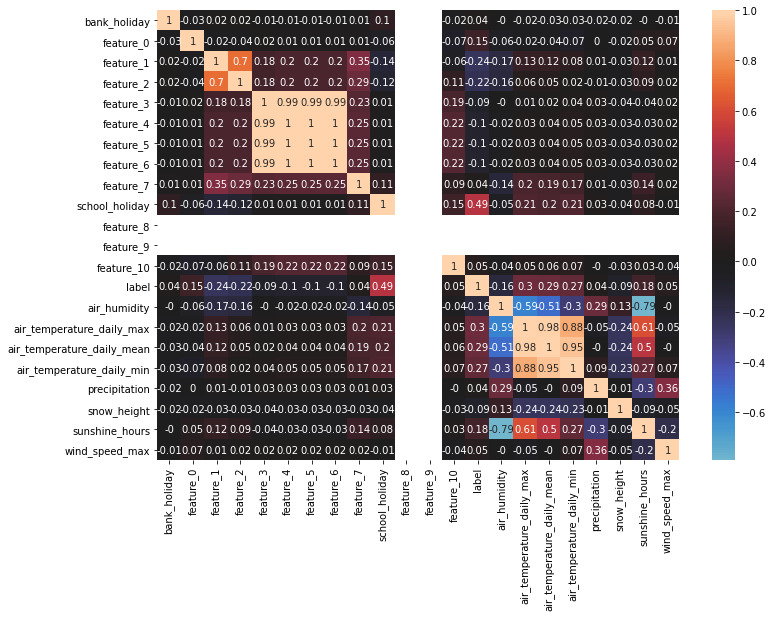

In [84]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.heatmap(df.corr().round(2), annot=True, center = 0)

In [85]:
df.columns

Index(['bank_holiday', 'feature_0', 'feature_1', 'feature_2', 'feature_3',
       'feature_4', 'feature_5', 'feature_6', 'feature_7', 'school_holiday',
       'feature_8', 'feature_9', 'feature_10', 'label', 'air_humidity',
       'air_temperature_daily_max', 'air_temperature_daily_mean',
       'air_temperature_daily_min', 'precipitation', 'snow_height',
       'sunshine_hours', 'wind_speed_max'],
      dtype='object')

We can see that 2 features 8&9 are not informative, we can drop them. Features 3,4,5,6 'air_temperature_daily_max', 'air_temperature_daily_mean', 'air_temperature_daily_min' highly correlated, so we can drop them as well(keep feature_6, 'air_temperature_daily_max')

In [128]:
df = df.drop(['feature_8', 'feature_9', 'feature_3','feature_4', 'feature_5', 
              'air_temperature_daily_mean', 'air_temperature_daily_min'], axis = 1)

<AxesSubplot:>

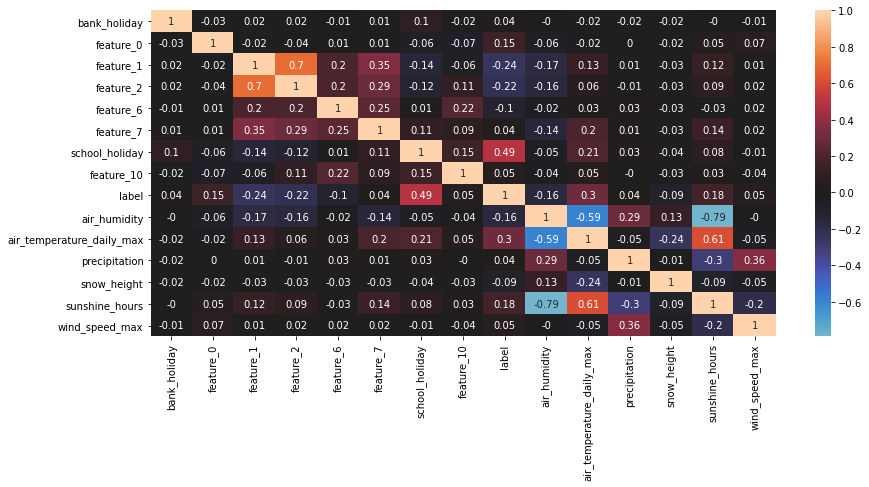

In [87]:
sns.heatmap(df.corr().round(2), annot=True, center = 0)

### Check missing values

<AxesSubplot:ylabel='date'>

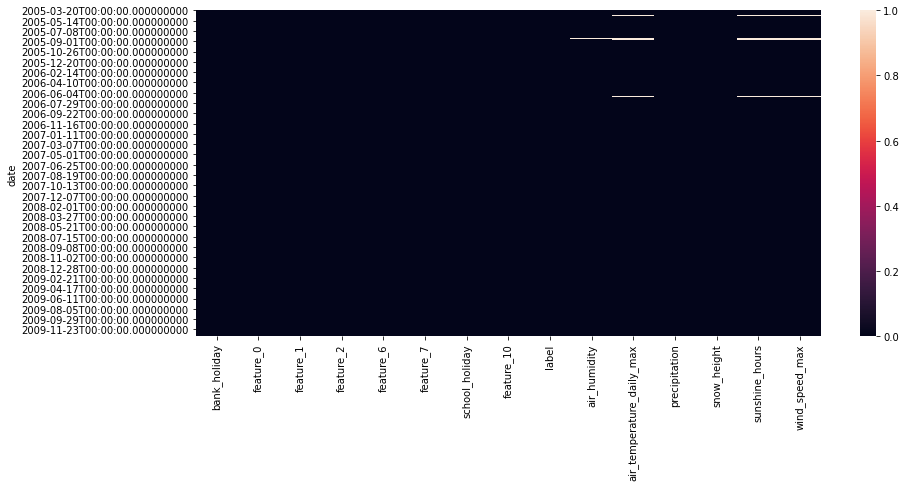

In [89]:
sns.heatmap(df.isna())

We can see some missing values in weather data

In [90]:
df.isna().any()

bank_holiday                 False
feature_0                    False
feature_1                    False
feature_2                    False
feature_6                    False
feature_7                    False
school_holiday               False
feature_10                   False
label                        False
air_humidity                  True
air_temperature_daily_max     True
precipitation                False
snow_height                  False
sunshine_hours                True
wind_speed_max                True
dtype: bool

We will replace Nan values with mean values 

In [129]:
df.loc[df['air_humidity'].isna()==True, 'air_humidity']=df['air_humidity'].mean()
df.loc[df['air_temperature_daily_max'].isna()==True, 'air_temperature_daily_max']=df['air_temperature_daily_max'].mean()
df.loc[df['sunshine_hours'].isna()==True, 'sunshine_hours']=df['sunshine_hours'].mean()
df.loc[df['wind_speed_max'].isna()==True, 'wind_speed_max']=df['wind_speed_max'].mean()

### Scale some data

In [130]:
scaler = RobustScaler()

In [131]:
columns_to_scale = ['feature_6','air_humidity', 'air_temperature_daily_max', 'precipitation', 'snow_height',
                   'sunshine_hours', 'wind_speed_max']
for col in columns_to_scale:
    df[col] = scaler.fit_transform(np.array(df[col]).reshape(-1, 1))

Linear Regression model as second base line model with full dataset

In [94]:
X=df.drop(['label'], axis=1)
y=df['label']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [96]:
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

In [97]:
print_scores('LinearRegression1', y_test, y_pred_test, y_train, y_pred_train)

LinearRegression1
Test
RMSE:  496.49
R2:  0.37
MAPE:  0.41
Train
RMSE:  487.08
R2:  0.37
MAPE:  0.4


### Check features importance


feature: bank_holiday, importance: (0, 19.27234759062547)
feature: feature_0, importance: (1, 413.4168001001457)
feature: feature_1, importance: (2, -466.685579003917)
feature: feature_2, importance: (3, -164.22058429369338)
feature: feature_6, importance: (4, -85.13933492832399)
feature: feature_7, importance: (5, 158.99799981139992)
feature: school_holiday, importance: (6, 231.47678885781485)
feature: feature_10, importance: (7, -98.03148605680595)
feature: air_humidity, importance: (8, -46.80674311850245)
feature: air_temperature_daily_max, importance: (9, 165.9411717678515)
feature: precipitation, importance: (10, 19.60060611432769)
feature: snow_height, importance: (11, -12.654554510077205)
feature: sunshine_hours, importance: (12, 10.641068729955618)
feature: wind_speed_max, importance: (13, 27.549774512434254)


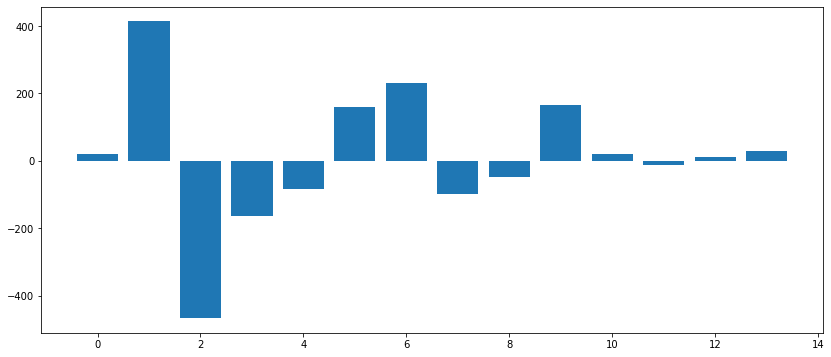

In [98]:
importance = lr.coef_
# summarize feature importance
for i,v in zip(X_train.columns, enumerate(importance)):
    print(f'feature: {i}, importance: {v}')
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Feature Engineering¶


Add month, week_day, step and year columns

In [132]:
df['year']=df.index.year
df['month']=df.index.month
df['week_day']=df.index.dayofweek
df['step'] = list(range(len(df)))
df['date'] = df.index

### Plotting

Check distribution of dependent value 'label'

<AxesSubplot:xlabel='label', ylabel='Count'>

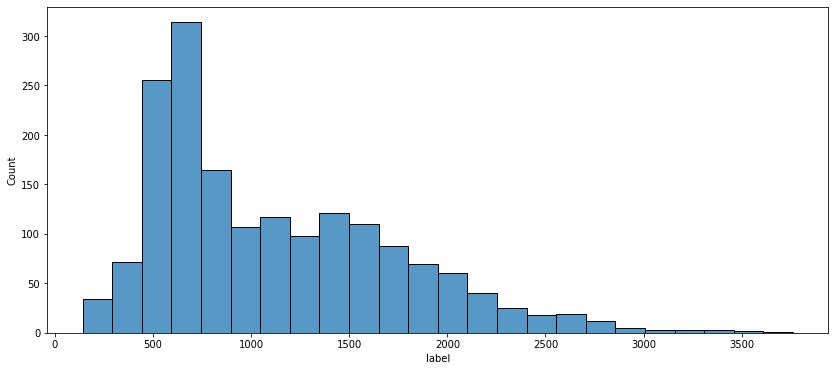

In [102]:
sns.histplot(df.label)

Plot dependences on season and holidays

<AxesSubplot:xlabel='step', ylabel='label'>

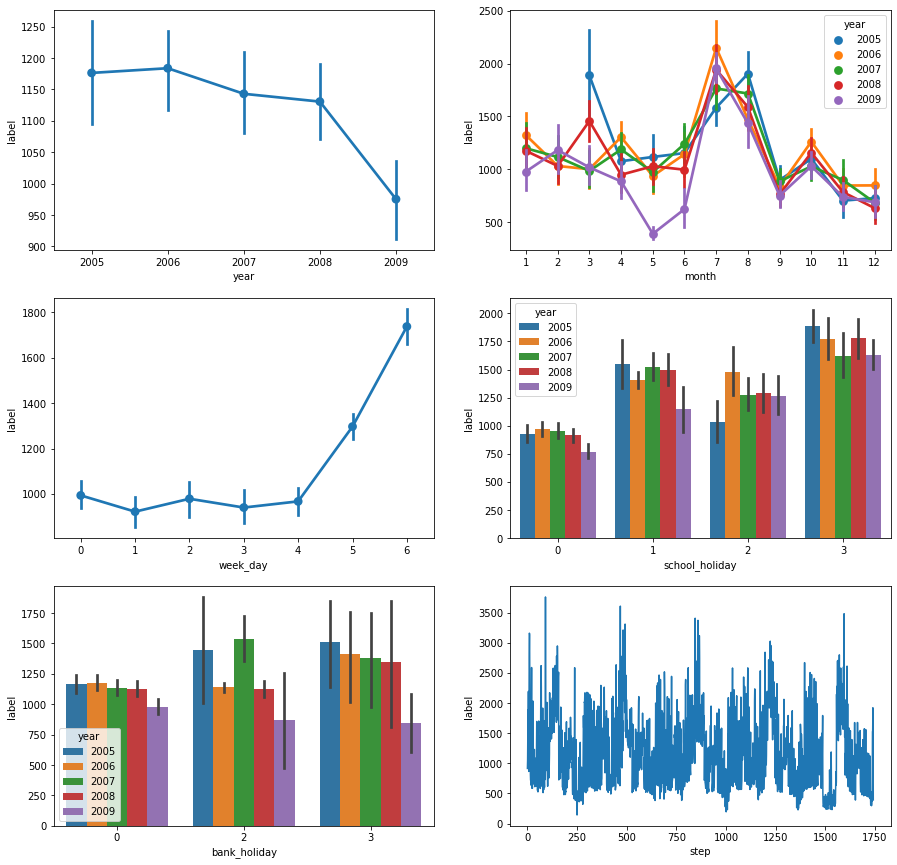

In [103]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(15, 15)
sns.pointplot(x = 'year', y='label', data = df, ax = axes[0, 0])
sns.pointplot(x='month', y='label', hue = 'year', data=df, ax=axes[0, 1])
sns.pointplot(x='week_day', y='label', data=df, ax=axes[1, 0])
sns.barplot(x='school_holiday', y='label', hue = 'year', data=df, ax=axes[1, 1])
sns.barplot(x='bank_holiday', y='label', hue = 'year', data=df, ax=axes[2, 0])
sns.lineplot(x='step', y='label', data=df, ax=axes[2, 1])

Plot dependences on weather

<AxesSubplot:xlabel='wind_speed_max', ylabel='label'>

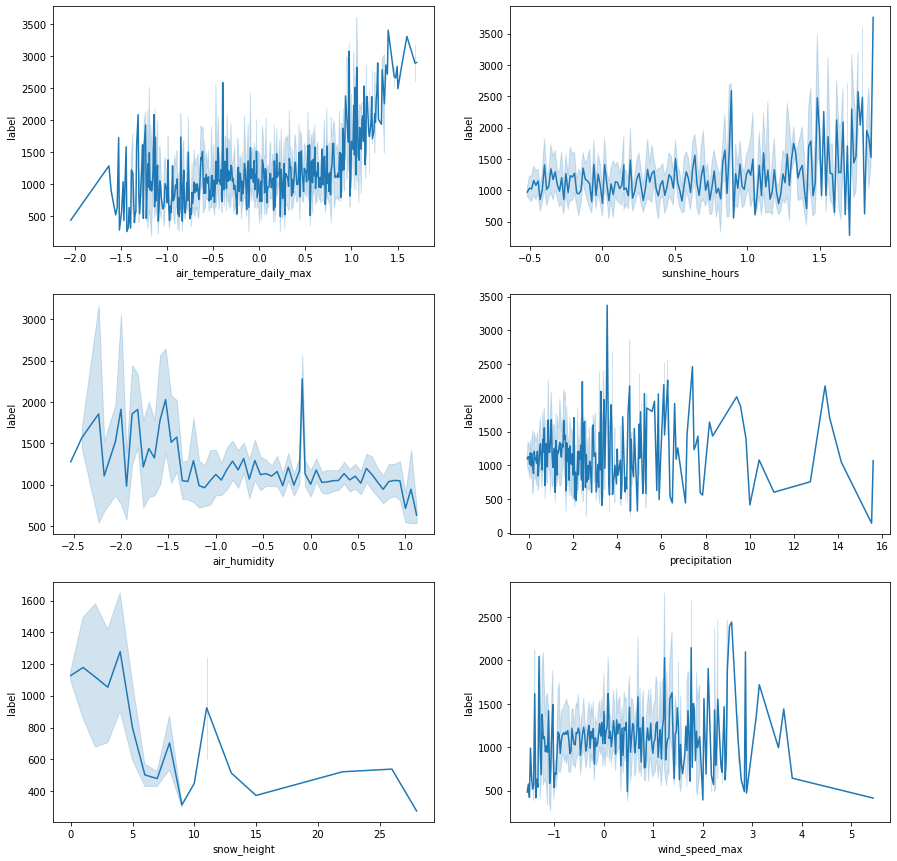

In [104]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(15, 15)
sns.lineplot(x='air_temperature_daily_max', y='label', data=df, ax=axes[0, 0])
sns.lineplot(x='sunshine_hours', y='label', data=df, ax=axes[0, 1])
sns.lineplot(x='air_humidity', y='label', data=df, ax=axes[1, 0])
sns.lineplot(x='precipitation', y='label', data=df, ax=axes[1, 1])
sns.lineplot(x='snow_height', y='label', data=df, ax=axes[2, 0])
sns.lineplot(x='wind_speed_max', y='label', data=df, ax=axes[2, 1])

Plot dependency on unknown features

<AxesSubplot:xlabel='feature_10', ylabel='label'>

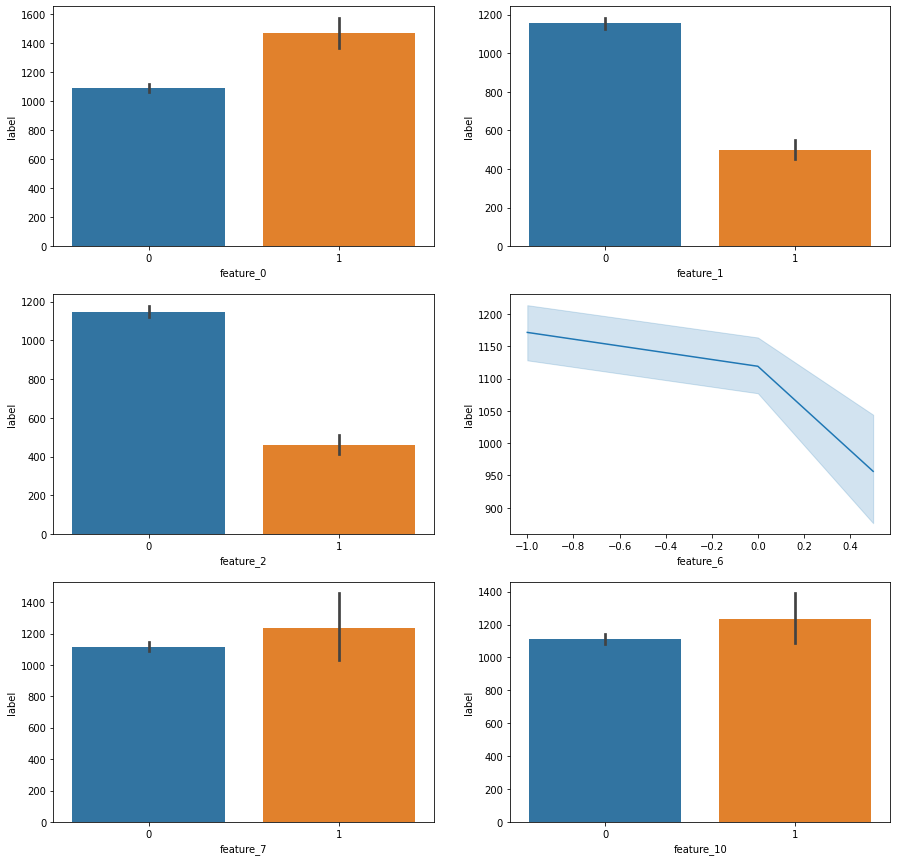

In [105]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(15, 15)
sns.barplot(x='feature_0', y='label', data=df, ax=axes[0, 0])
sns.barplot(x='feature_1', y='label', data=df, ax=axes[0, 1])
sns.barplot(x='feature_2', y='label', data=df, ax=axes[1, 0])
sns.lineplot(x='feature_6', y='label', data=df, ax=axes[1, 1])
sns.barplot(x='feature_7', y='label', data=df, ax=axes[2, 0])
sns.barplot(x='feature_10', y='label', data=df, ax=axes[2, 1])

For week days we get 0 for working days, 1 for Sat and 2 for Sun

In [133]:
def weekday(x):
    res = 0
    if x == 5:
        res = 1
    elif x==6:
        res = 2
    return res

In [134]:
df.week_day = df.week_day.apply(lambda x: weekday(x))

In 2009 something happened in May and June and number of visits were very low, why? Maybe closure due to renovation or something else happened. I would add +1000 clients in period between 04.2009 and 07.2009

<AxesSubplot:xlabel='date'>

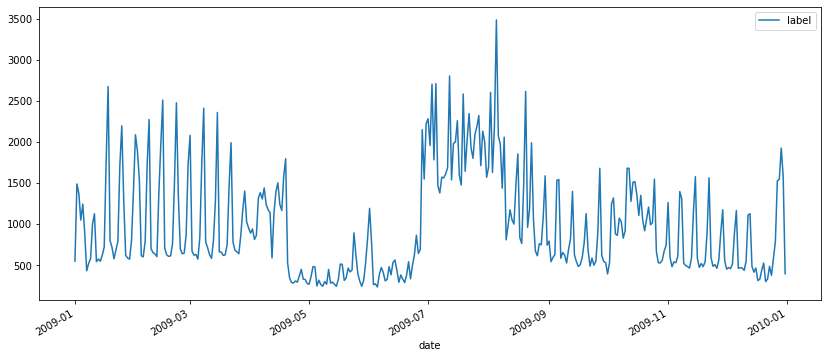

In [109]:
df.loc[df['year']==2009, ['label']].plot() #2009 year

<AxesSubplot:xlabel='date'>

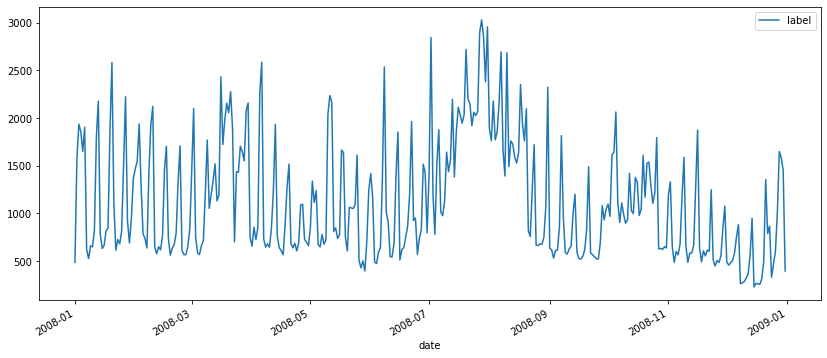

In [112]:
df.loc[df['year']==2008, ['label']].plot() #2008 year

Another LR model with new features

In [167]:
X = df.drop(['label', 'year', 'date'], axis = 1)
y = df['label']

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [169]:
lg=LinearRegression()
lg.fit(X_train, y_train)
y_pred_test = lg.predict(X_test)
y_pred_train = lg.predict(X_train)

In [170]:
print_scores('LinearRegression2', y_test, y_pred_test, y_train, y_pred_train)

LinearRegression2
Test
RMSE:  401.95
R2:  0.59
MAPE:  0.29
Train
RMSE:  387.24
R2:  0.6
MAPE:  0.29


### Check different models

In [171]:
from sklearn.linear_model import Lasso

In [172]:
la=Lasso(alpha = 0.5)
la.fit(X_train, y_train)
y_pred_test = la.predict(X_test)
y_pred_train = la.predict(X_train)

In [173]:
print_scores('Lasso', y_test, y_pred_test, y_train, y_pred_train)

Lasso
Test
RMSE:  401.61
R2:  0.59
MAPE:  0.29
Train
RMSE:  387.3
R2:  0.6
MAPE:  0.29


In [174]:
from sklearn.linear_model import ElasticNet

In [175]:
en=ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)
y_pred_test = en.predict(X_test)
y_pred_train = en.predict(X_train)

In [176]:
print_scores('ElasticNet', y_test, y_pred_test, y_train, y_pred_train)

ElasticNet
Test
RMSE:  402.36
R2:  0.59
MAPE:  0.29
Train
RMSE:  387.45
R2:  0.6
MAPE:  0.29


In [177]:
from sklearn.linear_model import BayesianRidge

In [178]:
br = BayesianRidge()

In [179]:
br.fit(X_train, y_train)
y_pred_test = br.predict(X_test)
y_pred_train = br.predict(X_train)

In [180]:
print_scores('BayesianRidge', y_test, y_pred_test, y_train, y_pred_train)

BayesianRidge
Test
RMSE:  402.23
R2:  0.59
MAPE:  0.29
Train
RMSE:  387.36
R2:  0.6
MAPE:  0.29


In [181]:
from sklearn.linear_model import SGDRegressor

In [182]:
sgd = SGDRegressor()
sgd.fit(X_train, y_train)
y_pred_test = sgd.predict(X_test)
y_pred_train = sgd.predict(X_train)

In [183]:
print_scores('SGDRegressor', y_test, y_pred_test, y_train, y_pred_train)

SGDRegressor
Test
RMSE:  96613017887419.56
R2:  -2.380062980604846e+22
MAPE:  107783020413.26
Train
RMSE:  93811993083304.94
R2:  -2.3410623009695518e+22
MAPE:  105044452349.31


In [184]:
from sklearn.tree import DecisionTreeRegressor

In [185]:
dt = DecisionTreeRegressor(max_depth=4)
dt.fit(X_train, y_train)
y_pred_test = dt.predict(X_test)
y_pred_train = dt.predict(X_train)

In [186]:
print_scores('DecisionTreeRegressor', y_test, y_pred_test, y_train, y_pred_train)

DecisionTreeRegressor
Test
RMSE:  358.98
R2:  0.67
MAPE:  0.28
Train
RMSE:  344.54
R2:  0.68
MAPE:  0.27


In [187]:
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

In [188]:
print_scores('RandomForestRegressor', y_test, y_pred_test, y_train, y_pred_train)

RandomForestRegressor
Test
RMSE:  267.65
R2:  0.82
MAPE:  0.19
Train
RMSE:  109.1
R2:  0.97
MAPE:  0.07


The best results gave RandomForestRegressor, I will tune this model

In [189]:
# max_features = 5, max_depth = 14, n_estimators = 250
param_grid = [
{'n_estimators': [200,250,300], 'max_features': [10,11,12,13,14,15,16,17], 
 'max_depth': [10, 11,12,13,14,15,16,17]}
]

gs_rf = GridSearchCV(rf, param_grid, cv=10, scoring='neg_mean_squared_error')
gs_rf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14, 15, 16, 17],
                          'max_features': [10, 11, 12, 13, 14, 15, 16, 17],
                          'n_estimators': [200, 250, 300]}],
             scoring='neg_mean_squared_error')

In [190]:
gs_rf.best_estimator_

RandomForestRegressor(max_depth=14, max_features=10, n_estimators=300)

In [191]:
y_pred_test = gs_rf.predict(X_test)
y_pred_train = gs_rf.predict(X_train)

In [192]:
print_scores('RandomForestRegressor_tuned', y_test, y_pred_test, y_train, y_pred_train)

RandomForestRegressor_tuned
Test
RMSE:  257.43
R2:  0.83
MAPE:  0.19
Train
RMSE:  117.0
R2:  0.96
MAPE:  0.09


In [193]:
# extract the numerical values of feature importance from the grid search
importances = gs_rf.best_estimator_.feature_importances_

#create a feature list from the original dataset (list of columns)
feature_list = list(X.columns)

#create a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)

#create two lists from the previous list of tuples
df_fi = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df_fi['importance'])
feature= list(df_fi['feature'])

print(df_fi)

    importance                    feature
0     0.261157             school_holiday
1     0.252996                   week_day
2     0.137747  air_temperature_daily_max
3     0.094893                      month
4     0.059008                       step
5     0.034454             sunshine_hours
6     0.032428               air_humidity
7     0.031774             wind_speed_max
8     0.025540               bank_holiday
9     0.019669              precipitation
10    0.012769                  feature_1
11    0.010933                  feature_2
12    0.009547                  feature_0
13    0.005044                  feature_6
14    0.004568                snow_height
15    0.003865                 feature_10
16    0.003607                  feature_7


In [194]:
df.to_csv('data/prepared_scaled.csv',index = True)